In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
import warnings

In [2]:
sns.set(style="whitegrid")   #seting the plot style for visualization

In [3]:
#the datasets will be load and convert data frame
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species"] = iris.target

In [4]:
df["species"] = df["species"].map({0: "setosa",1: "versicolor",2: "viginica"})


In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,viginica
146,6.3,2.5,5.0,1.9,viginica
147,6.5,3.0,5.2,2.0,viginica
148,6.2,3.4,5.4,2.3,viginica


In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,viginica
146,6.3,2.5,5.0,1.9,viginica
147,6.5,3.0,5.2,2.0,viginica
148,6.2,3.4,5.4,2.3,viginica
149,5.9,3.0,5.1,1.8,viginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

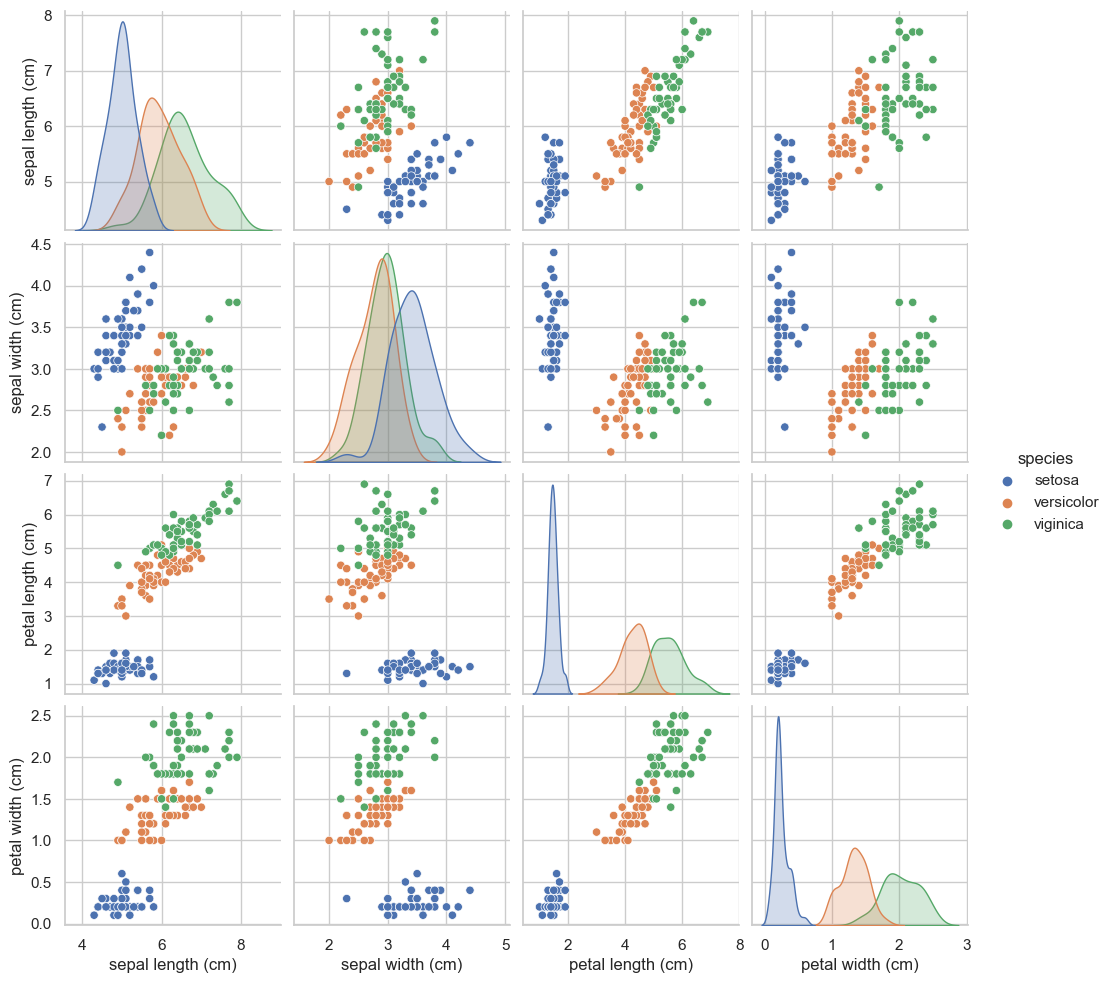

In [11]:
#visualing the each features distributionss

sns.pairplot(df, hue="species")
plt.show()

In [12]:
#features and tarfet values in data set 

x = df.drop(columns=["species"])
y = df["species"]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify=y)


In [14]:
#standardize the features

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
#random forest classifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [16]:
y_pred = model.predict(x_test)

In [17]:
y_pred

array(['setosa', 'viginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'viginica', 'versicolor',
       'viginica', 'viginica', 'viginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'viginica', 'versicolor', 'versicolor', 'viginica',
       'viginica', 'versicolor', 'setosa', 'viginica', 'setosa'],
      dtype=object)

In [18]:
#evolving 

print("Accuracy  ======================>", accuracy_score(y_test, y_pred))
print("\n\n")
print("Confusion Matrix ===============>\n",confusion_matrix(y_test, y_pred) )
print("\n\n")
print("Classification Report===========>\n",classification_report(y_test,y_pred))

Accuracy  ======================> 0.9



Confusion Matrix ===============>
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]



Classification Report===========>
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
    viginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Text(0.5, 1.0, 'Confusion matrix')

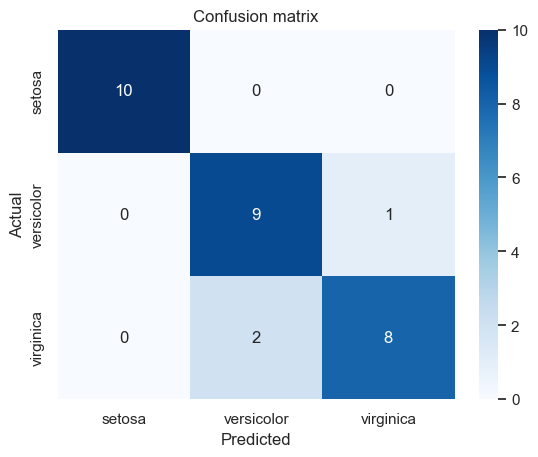

In [19]:
#visualize the confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion matrix")

In [20]:
#fine tuning model 

In [21]:
param_grid = { "n_estimators":[50, 100, 200],
             "max_depth":[None, 10, 20, 30],
             "min_samples_split":[2, 5, 10],
             "min_samples_leaf":[1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)



Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [22]:
#now get the best model

best_rf = grid_search.best_estimator_
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [23]:
y_pred_best = best_rf.predict(x_test)

In [24]:
y_pred_best

array(['setosa', 'viginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'viginica', 'versicolor',
       'viginica', 'viginica', 'viginica', 'versicolor', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'viginica',
       'setosa', 'viginica', 'versicolor', 'viginica', 'viginica',
       'viginica', 'versicolor', 'setosa', 'viginica', 'setosa'],
      dtype=object)

In [25]:
print("Accuracy ==========> ", accuracy_score(y_test, y_pred_best))
print("\n")
print("Confusion Matrix ==>\n",confusion_matrix(y_test, y_pred_best))
print("\n")
print("classification report===>\n",classification_report(y_test, y_pred_best))

Accuracy ==========>  0.9666666666666667


Confusion Matrix ==>
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


classification report===>
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
    viginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [26]:
new_flower = np.array([[1.5,0.3, 1.4, 0.1]])

In [27]:
new_flower_df = pd.DataFrame(new_flower, columns=iris.feature_names)


In [28]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    new_flower_scaled = scaler.transform(new_flower_df)
    predicted_species = best_rf.predict(new_flower_scaled)

In [29]:
predicted_species

array(['setosa'], dtype=object)